In [25]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [54]:
dataset_dir = "datasets"
file_path = os.path.join(dataset_dir, 'dataset.csv')

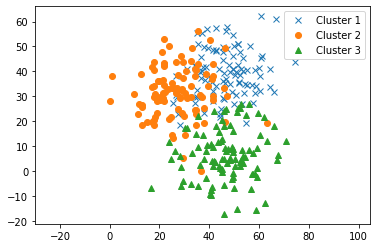

In [18]:
# If the dataset already exists, load it
if os.path.exists(dataset_dir) and os.path.exists(file_path):
    print(f"Dataset already exists at: {file_path}")
    df = pd.read_csv(file_path)  # Load the existing dataset
    # Extract x, y coordinates and labels
    x = df['x'].values
    y = df['y'].values
    labels = df['label'].values
else:
    # Generate random means for three distributions
    mean1 = [np.random.randint(50), np.random.randint(50)]
    mean2 = [np.random.randint(50), np.random.randint(50)] 
    mean3 = [np.random.randint(75), np.random.randint(75)] 

    # Define a diagonal covariance matrix
    cov = [[100, 0], [0, 100]]  # Variance of 100 in both x and y directions, no covariance

    # Generate random data points for each cluster
    x1, y1 = np.random.multivariate_normal(mean1, cov, 100).T
    x2, y2 = np.random.multivariate_normal(mean2, cov, 100).T
    x3, y3 = np.random.multivariate_normal(mean3, cov, 100).T 

    # Combine the data from all three clusters
    x = np.append(x1, np.append(x2, x3))  # Combined x-coordinates
    y = np.append(y1, np.append(y2, y3))  # Combined y-coordinates

    # Visualize the data
    plt.plot(x1, y1, 'x', label="Cluster 1")
    plt.plot(x2, y2, 'o', label="Cluster 2")
    plt.plot(x3, y3, '^', label="Cluster 3")
    plt.axis('equal')  # Ensure the axes are scaled equally
    plt.legend()
    plt.show()


In [26]:
    data = []
    labels = []

    # Add data and labels for each cluster by combining xi and yi into a 2D array for Cluster i
    data.append(np.column_stack((x1, y1)))
    labels.extend(["Zone 1"] * len(x1))

    data.append(np.column_stack((x2, y2)))
    labels.extend(["Zone 2"] * len(x2))

    data.append(np.column_stack((x3, y3)))
    labels.extend(["Zone 3"] * len(x3))
    
    # Combine all data points into a single array and create a DataFrame
    data = np.vstack(data) # Vertical stack of data
    # Add first column explaining data
    df = pd.DataFrame(data, columns=["x", "y"])
    df["label"] = labels

    if not os.path.exists("datasets"):
        os.makedirs("datasets")  # Create directory if it doesn't exist
    file_path = os.path.join("datasets", 'dataset.csv')
    df.to_csv(file_path, index=False)
    print(f"Dataset saved at: {file_path}")

Dataset saved at: datasets\dataset.csv


In [52]:
centroids = kmeans.cluster_centers_

In [33]:
X = np.column_stack((x, y))

In [48]:
# Make KMeans model
kmeans = KMeans(n_clusters = 3, max_iter = 1250)

In [49]:
# Fit the model to the data
kmeans.fit(X)

KMeans(max_iter=1250, n_clusters=3)

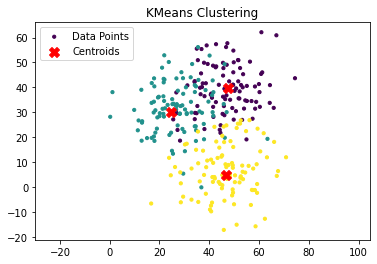

In [50]:
# Convert string labels to numerical labels
label_map = {"Zone 1": 0, "Zone 2": 1, "Zone 3": 2}
numeric_labels = [label_map[label] for label in labels]

# Perform the plotting
plt.scatter(x, y, c=numeric_labels, cmap='viridis', s=10, label="Data Points")  # Color points by numerical labels
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=100, label="Centroids")  # Plot centroids
plt.axis('equal')  # Ensure the axes are scaled equally
plt.legend()
plt.title("KMeans Clustering")
plt.show()

In [53]:
print(centroids)
print(mean1, mean2, mean3)

[[47.52018833 39.5503601 ]
 [24.60787301 30.24024329]
 [46.5747927   4.82234113]]
[46, 39] [26, 29] [46, 8]
